<a href="https://colab.research.google.com/github/Krithiga2006/SCT_DS_4/blob/main/SCT_DS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving AccidentsBig.csv to AccidentsBig (3).csv


/tmp/ipython-input-4265721667.py:9: DtypeWarning: Columns (8,10,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AccidentsBig.csv")


   Accident_Index  longitude   latitude  Police_Force  Accident_Severity  \
0             1.0  78.610393  14.724026           1.0                2.0   
1             2.0  78.534042  14.762353           1.0                3.0   
2             3.0  78.470877  14.745606           1.0                3.0   
3             4.0  78.557994  14.667128           1.0                3.0   
4             5.0  78.576431  14.703443           1.0                3.0   

   Number_of_Vehicles  Number_of_Casualties  Day_of_Week   Time  \
0                 1.0                   1.0          3.0  17:42   
1                 1.0                   1.0          4.0  17:36   
2                 2.0                   1.0          5.0  00:15   
3                 1.0                   1.0          6.0  10:35   
4                 1.0                   1.0          2.0  21:13   

   Local_Authority_(District)  ... Pedestrian_Crossing-Physical_Facilities  \
0                        12.0  ...                            

/tmp/ipython-input-4265721667.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')


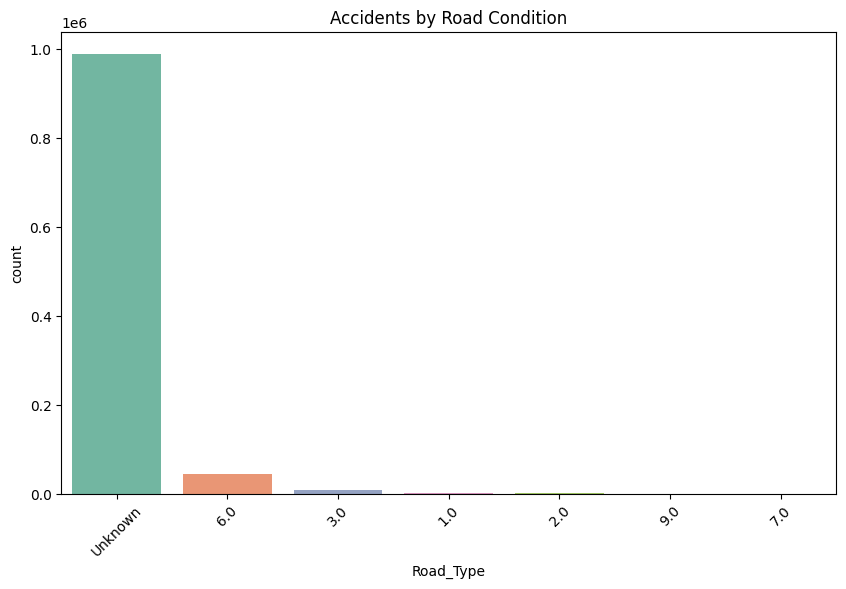

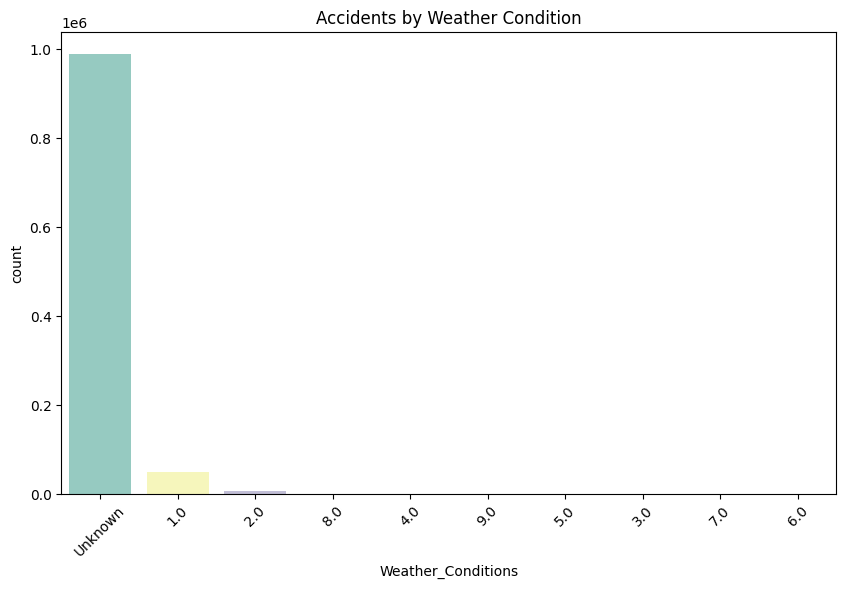

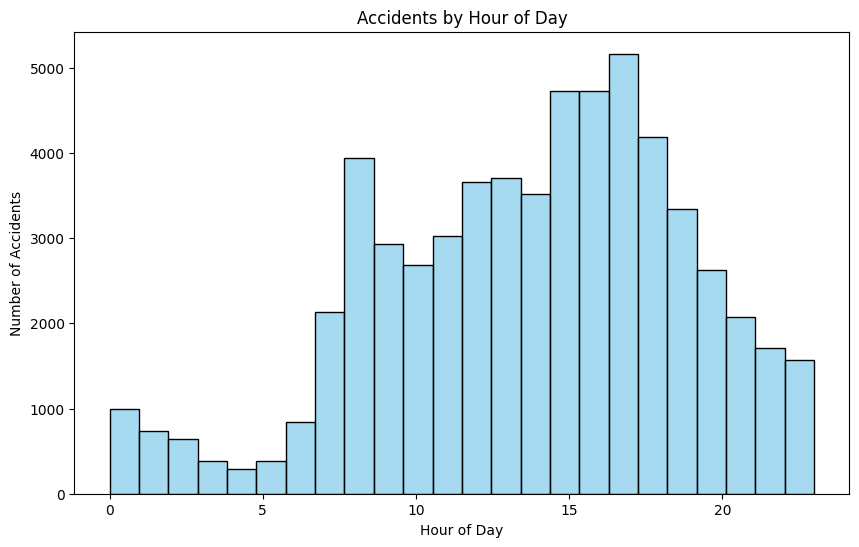

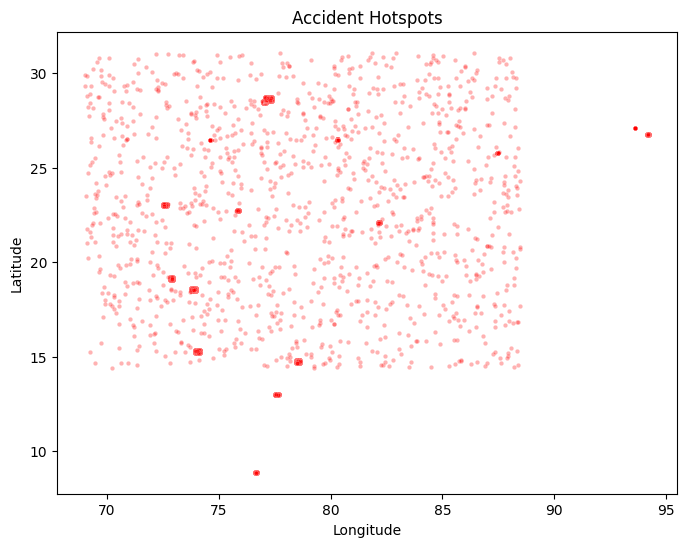

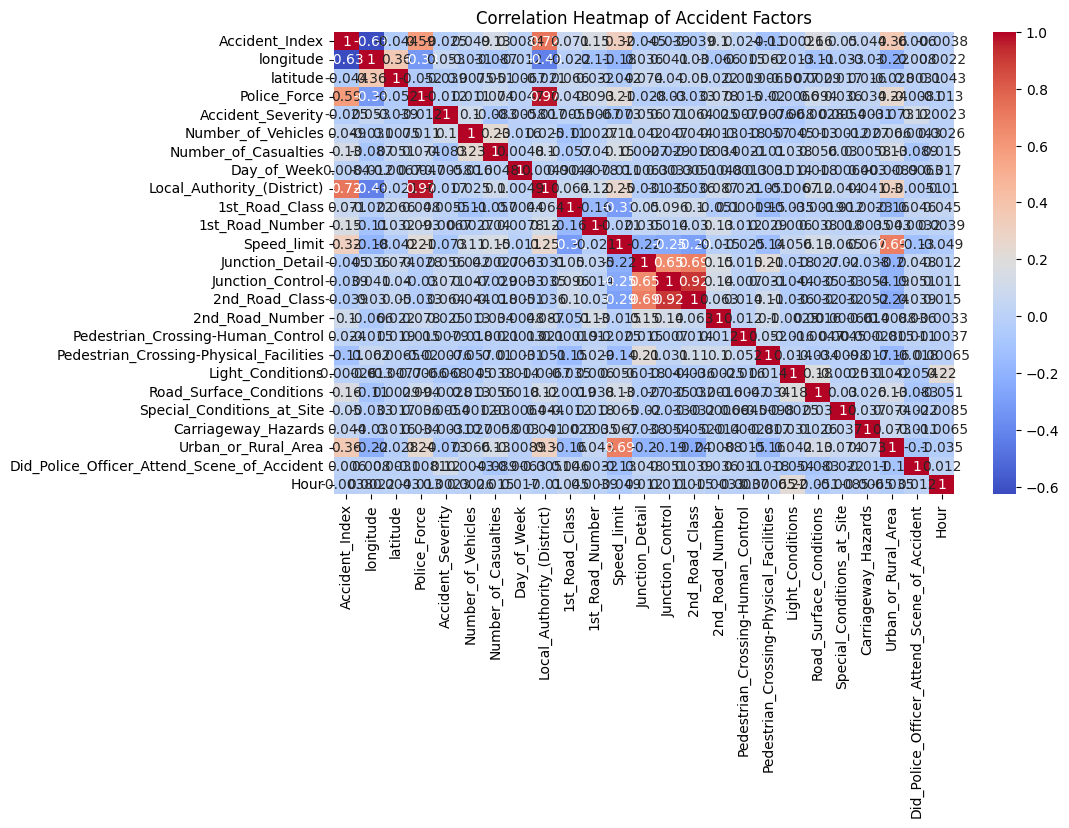

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("AccidentsBig.csv")
print(df.head())
print(df.info())
print(df.describe(include='all'))
df['Weather_Conditions'] = df['Weather_Conditions'].fillna("Unknown")
df['Road_Type'] = df['Road_Type'].fillna("Unknown")
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Hour'] = df['Time'].dt.hour
plt.figure(figsize=(10,6))
sns.countplot(x='Road_Type', data=df, order=df['Road_Type'].value_counts().index, palette="Set2")
plt.title("Accidents by Road Condition")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10,6))
sns.countplot(x='Weather_Conditions', data=df, order=df['Weather_Conditions'].value_counts().index[:10], palette="Set3")
plt.title("Accidents by Weather Condition")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(df['Hour'], bins=24, kde=False, color="skyblue")
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()
plt.figure(figsize=(8,6))
sns.scatterplot(x='longitude', y='latitude', data=df, alpha=0.3, s=10, color="red")
plt.title("Accident Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Accident Factors")
plt.show()
